# Setup and Context

### Introduction

On November 27, 1895, Alfred Nobel signed his last will in Paris. When it was opened after his death, the will caused a lot of controversy, as Nobel had left much of his wealth for the establishment of a prize.

Alfred Nobel dictates that his entire remaining estate should be used to endow “prizes to those who, during the preceding year, have conferred the greatest benefit to humankind”.

Every year the Nobel Prize is given to scientists and scholars in the categories chemistry, literature, physics, physiology or medicine, economics, and peace.

<img src=https://i.imgur.com/36pCx5Q.jpg>

Let's see what patterns we can find in the data of the past Nobel laureates. What can we learn about the Nobel prize and our world more generally?

### Upgrade plotly (only Google Colab Notebook)

Google Colab may not be running the latest version of plotly. If you're working in Google Colab, uncomment the line below, run the cell, and restart your notebook server.

In [1]:
%pip install --upgrade plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 41.9 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.24.1
    Uninstalling plotly-5.24.1:
      Successfully uninstalled plotly-5.24.1


### Import Statements

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

### Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

### Read the Data

In [5]:
df_data = pd.read_csv('nobel_prize_data.csv')

Caveats: The exact birth dates for Michael Houghton, Venkatraman Ramakrishnan, and Nadia Murad are unknown. I've substituted them with mid-year estimate of July 2nd.


# Data Exploration & Cleaning

**Challenge**: Preliminary data exploration.
* What is the shape of `df_data`? How many rows and columns?
* What are the column names?
* In which year was the Nobel prize first awarded?
* Which year is the latest year included in the dataset?

In [6]:
df_data

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
957,2020,Medicine,The Nobel Prize in Physiology or Medicine 2020,“for the discovery of Hepatitis C virus”,1/3,Individual,Michael Houghton,1949-07-02,NaN,United Kingdom,United Kingdom,Male,University of Alberta,Edmonton,Canada,GBR
958,2020,Peace,The Nobel Peace Prize 2020,"“for its efforts to combat hunger, for its con...",1/1,Organization,World Food Programme (WFP),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
959,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery of a supermassive compact o...,1/4,Individual,Andrea Ghez,1965-06-16,"New York, NY",United States of America,United States of America,Female,University of California,"Berkeley, CA",United States of America,USA
960,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery of a supermassive compact o...,1/4,Individual,Reinhard Genzel,1952-03-24,Bad Homburg vor der Höhe,Germany,Germany,Male,University of California,"Los Angeles, CA",United States of America,DEU


In [7]:
df_data.shape

(962, 16)

In [8]:
df_data.columns

Index(['year', 'category', 'prize', 'motivation', 'prize_share',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'birth_country_current', 'sex', 'organization_name',
       'organization_city', 'organization_country', 'ISO'],
      dtype='object')

In [9]:
df_data.year.min()

1901

In [10]:
df_data.year.max()

2020

**Challange**:
* Are there any duplicate values in the dataset?
* Are there NaN values in the dataset?
* Which columns tend to have NaN values?
* How many NaN values are there per column?
* Why do these columns have NaN values?  

### Check for Duplicates

In [11]:
duplicates = df_data.duplicated()
len(duplicates)

962

### Check for NaN Values

In [12]:
df_data.isna().sum()

,0
year,0
category,0
prize,0
motivation,88
prize_share,0
laureate_type,0
full_name,0
birth_date,28
birth_city,31
birth_country,28


In [13]:
col_subset = ['year','category', 'laureate_type',
              'birth_date','full_name', 'organization_name']
df_data.loc[df_data.birth_date.isna()][col_subset]

,year,category,laureate_type,birth_date,full_name,organization_name
24,1904,Peace,Organization,NaN,Institut de droit international (Institute of ...,NaN
60,1910,Peace,Organization,NaN,Bureau international permanent de la Paix (Per...,NaN
89,1917,Peace,Organization,NaN,Comité international de la Croix Rouge (Intern...,NaN
200,1938,Peace,Organization,NaN,Office international Nansen pour les Réfugiés ...,NaN
215,1944,Peace,Organization,NaN,Comité international de la Croix Rouge (Intern...,NaN
237,1947,Peace,Organization,NaN,American Friends Service Committee (The Quakers),NaN
238,1947,Peace,Organization,NaN,Friends Service Council (The Quakers),NaN
283,1954,Peace,Organization,NaN,Office of the United Nations High Commissioner...,NaN
348,1963,Peace,Organization,NaN,Comité international de la Croix Rouge (Intern...,NaN
349,1963,Peace,Organization,NaN,Ligue des Sociétés de la Croix-Rouge (League o...,NaN


### Type Conversions

**Challenge**:
* Convert the `birth_date` column to Pandas `Datetime` objects
* Add a Column called `share_pct` which has the laureates' share as a percentage in the form of a floating-point number.

#### Convert Year and Birth Date to Datetime

In [14]:
df_data.birth_date =pd.DatetimeIndex(df_data.birth_date)

#### Add a Column with the Prize Share as a Percentage

In [18]:
separated_values = df_data.prize_share.str.split('/', expand=True)
numerator = pd.to_numeric(separated_values[0])
denomenator = pd.to_numeric(separated_values[1])
df_data['share_pct'] = numerator / denomenator * 100

In [19]:
df_data.head()

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD,100.00
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA,100.00
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL,100.00
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA,50.00
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE,50.00


# Come up with 3 Questions

**Challenge**: Pause here for a moment and think about the kind of data you saw in the columns. Write down at least 3 questions that you'd like to explore as part of this analysis.

1. What percentage of the Nobel laureates were women?
2. How many prizes were given out in each category
3. Who won the most Nobel prizes?

# Plotly Donut Chart: Percentage of Male vs. Female Laureates

**Challenge**: Create a [donut chart using plotly](https://plotly.com/python/pie-charts/) which shows how many prizes went to men compared to how many prizes went to women. What percentage of all the prizes went to women?

In [53]:
fig = px.pie(values=df_data.sex.value_counts().values,
             labels=df_data.sex.value_counts().index,
             title="Percentage of Male vs. Female Winners",
             names=df_data.sex.value_counts().index,
             hole=0.4)

fig.update_traces(textposition='inside', textfont_size=15, textinfo='percent')

fig.show()

# Who were the first 3 Women to Win the Nobel Prize?

**Challenge**:
* What are the names of the first 3 female Nobel laureates?
* What did the win the prize for?
* What do you see in their `birth_country`? Were they part of an organisation?

In [27]:
df_women = df_data[df_data.sex == 'Female']
df_women.sort_values('year').head(3)

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
18,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Poland,Female,NaN,NaN,NaN,POL,25.00
29,1905,Peace,The Nobel Peace Prize 1905,NaN,1/1,Individual,"Baroness Bertha Sophie Felicita von Suttner, n...",1843-06-09,Prague,Austrian Empire (Czech Republic),Czech Republic,Female,NaN,NaN,NaN,CZE,100.00
51,1909,Literature,The Nobel Prize in Literature 1909,"""in appreciation of the lofty idealism, vivid ...",1/1,Individual,Selma Ottilia Lovisa Lagerlöf,1858-11-20,Mårbacka,Sweden,Sweden,Female,NaN,NaN,NaN,SWE,100.00


# Find the Repeat Winners

**Challenge**: Did some people get a Nobel Prize more than once? If so, who were they?

In [34]:
is_winner = df_data.duplicated(subset=['full_name'], keep=False)
multiple_winners = df_data[is_winner]
multiple_winners.full_name.nunique()

6

In [35]:
col_subset = ['year', 'category', 'laureate_type', 'full_name']
multiple_winners[col_subset]

,year,category,laureate_type,full_name
18,1903,Physics,Individual,"Marie Curie, née Sklodowska"
62,1911,Chemistry,Individual,"Marie Curie, née Sklodowska"
89,1917,Peace,Organization,Comité international de la Croix Rouge (Intern...
215,1944,Peace,Organization,Comité international de la Croix Rouge (Intern...
278,1954,Chemistry,Individual,Linus Carl Pauling
283,1954,Peace,Organization,Office of the United Nations High Commissioner...
297,1956,Physics,Individual,John Bardeen
306,1958,Chemistry,Individual,Frederick Sanger
340,1962,Peace,Individual,Linus Carl Pauling
348,1963,Peace,Organization,Comité international de la Croix Rouge (Intern...


# Number of Prizes per Category

**Challenge**:
* In how many categories are prizes awarded?
* Create a plotly bar chart with the number of prizes awarded by category.
* Use the color scale called `Aggrnyl` to colour the chart, but don't show a color axis.
* Which category has the most number of prizes awarded?
* Which category has the fewest number of prizes awarded?

In [47]:
prizes_per_category = df_data.category.value_counts()

In [52]:
v_bar = px.bar(x=prizes_per_category.index,
        y=prizes_per_category.values,
        color = prizes_per_category.values,
        color_continuous_scale='Aggrnyl',
        title='Number of Prizes Awarded per Category')

v_bar.update_layout(xaxis_title='Nobel Prize Category',
                    coloraxis_showscale=False,
                    yaxis_title='Number of Prizes')
v_bar.show()

**Challenge**:
* When was the first prize in the field of Economics awarded?
* Who did the prize go to?

In [45]:
df_data[df_data.category == 'Economics'].sort_values('year').head(1)

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
393,1969,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having developed and applied dynamic mode...",1/2,Individual,Jan Tinbergen,1903-04-12,the Hague,Netherlands,Netherlands,Male,The Netherlands School of Economics,Rotterdam,Netherlands,NLD,50.00


# Male and Female Winners by Category

**Challenge**: Create a [plotly bar chart](https://plotly.com/python/bar-charts/) that shows the split between men and women by category.
* Hover over the bar chart. How many prizes went to women in Literature compared to Physics?

<img src=https://i.imgur.com/od8TfOp.png width=650>

In [55]:
cat_men_women = df_data.groupby(['category', 'sex'],
                                as_index=False).agg({'prize': pd.Series.count})
cat_men_women.sort_values('prize', ascending=False, inplace=True)

In [56]:
v_bar_split = px.bar(x = cat_men_women.category,
                      y = cat_men_women.prize,
                      color = cat_men_women.sex,
                      title='Number of Prizes Awarded per Category split by Men and Women')

v_bar_split.update_layout(xaxis_title='Nobel Prize Category',
                          yaxis_title='Number of Prizes')
v_bar_split.show()

# Number of Prizes Awarded Over Time

**Challenge**: Are more prizes awarded recently than when the prize was first created? Show the trend in awards visually.
* Count the number of prizes awarded every year.
* Create a 5 year rolling average of the number of prizes (Hint: see previous lessons analysing Google Trends).
* Using Matplotlib superimpose the rolling average on a scatter plot.
* Show a tick mark on the x-axis for every 5 years from 1900 to 2020. (Hint: you'll need to use NumPy).

<img src=https://i.imgur.com/4jqYuWC.png width=650>

* Use the [named colours](https://matplotlib.org/3.1.0/gallery/color/named_colors.html) to draw the data points in `dogerblue` while the rolling average is coloured in `crimson`.

<img src=https://i.imgur.com/u3RlcJn.png width=350>

* Looking at the chart, did the first and second world wars have an impact on the number of prizes being given out?
* What could be the reason for the trend in the chart?


In [77]:
prizes_per_year = df_data.groupby(by='year').count().prize
prizes_per_year

,prize
year,
1901,6
1902,7
1903,7
1904,6
1905,5
...,...
2016,11
2017,12
2018,13


In [74]:
moving_average = prizes_per_year.rolling(window=5).mean()

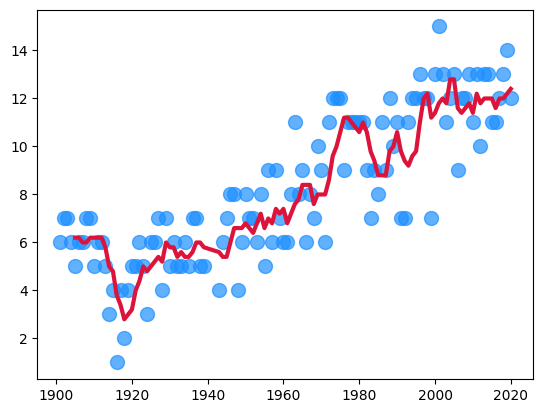

In [75]:
plt.scatter(x = prizes_per_year.index,
            y = prizes_per_year.values,
            color='dodgerblue',
            alpha=0.7,
            s=100)

plt.plot(prizes_per_year.index,
        moving_average.values,
        c='crimson',
        linewidth=3,)

plt.show()

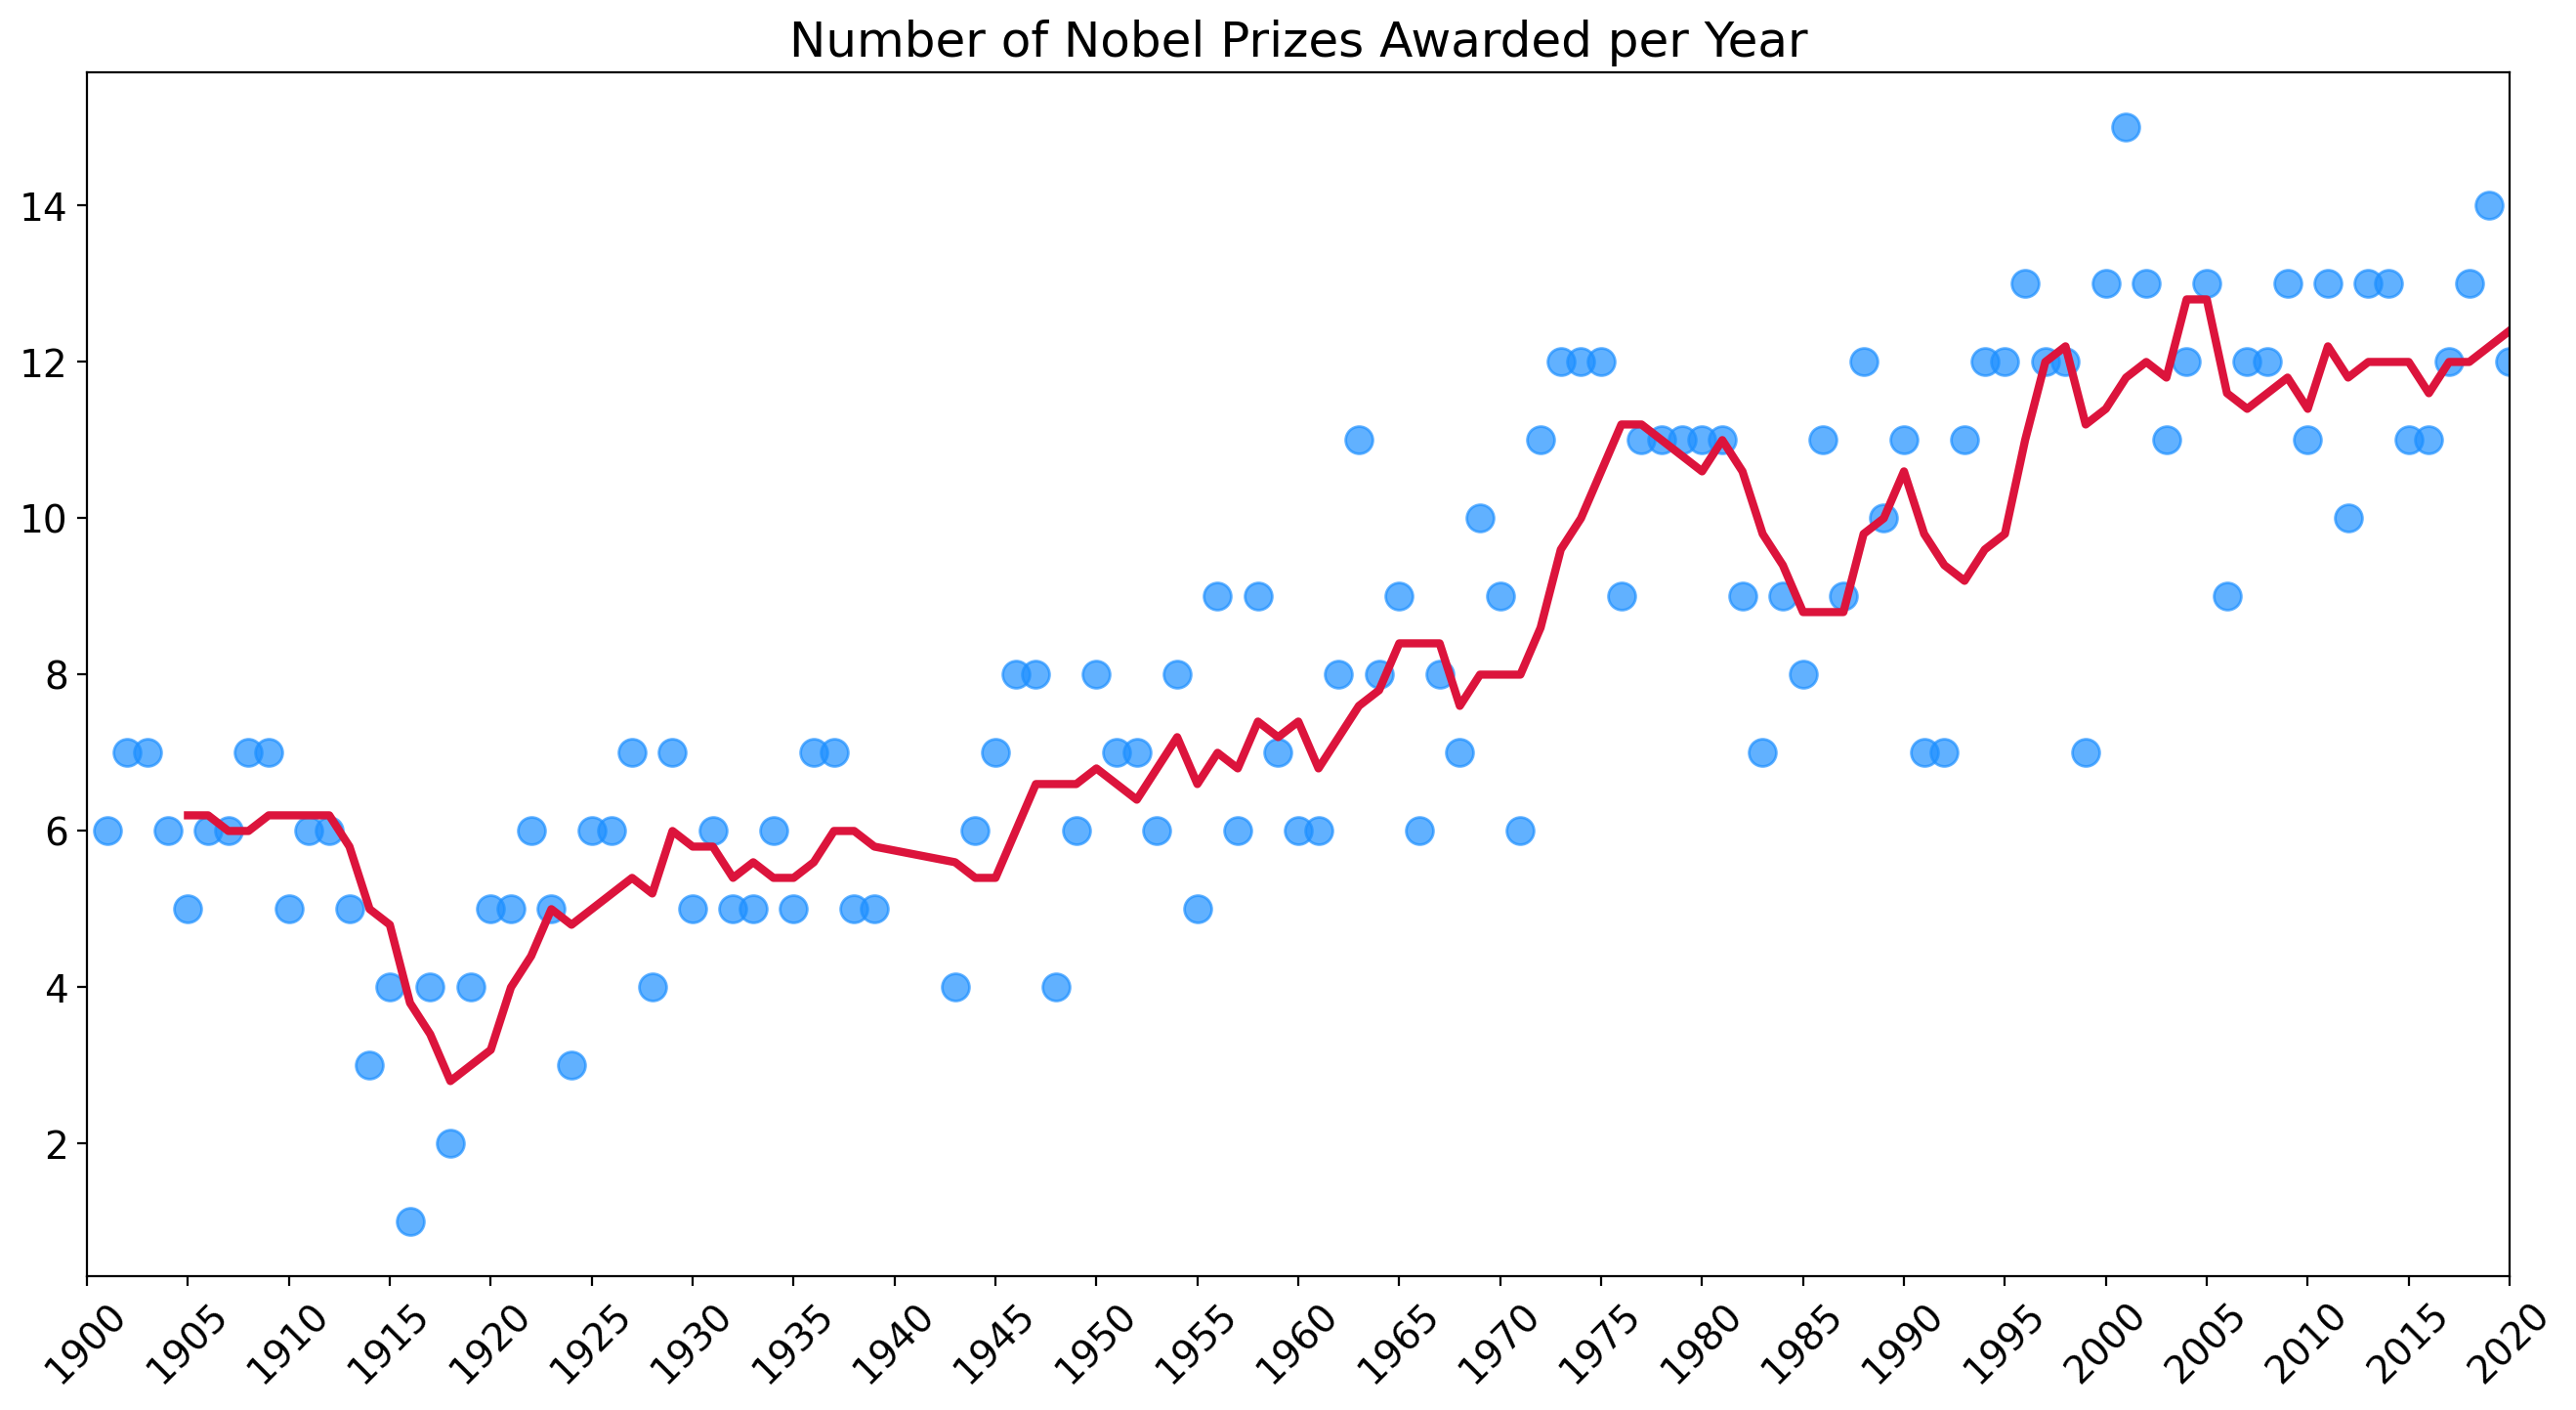

In [76]:
plt.figure(figsize=(16,8), dpi=200)
plt.title('Number of Nobel Prizes Awarded per Year', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(1900, 2021, step=5),
           fontsize=14,
           rotation=45)

ax = plt.gca() # get current axis
ax.set_xlim(1900, 2020)

plt.scatter(x = prizes_per_year.index,
            y = prizes_per_year.values,
            color='dodgerblue',
            alpha=0.7,
            s=100)

plt.plot(prizes_per_year.index,
        moving_average.values,
        c='crimson',
        linewidth=3,)

plt.show()

# Are More Prizes Shared Than Before?

**Challenge**: Investigate if more prizes are shared than before.

* Calculate the average prize share of the winners on a year by year basis.
* Calculate the 5 year rolling average of the percentage share.
* Copy-paste the cell from the chart you created above.
* Modify the code to add a secondary axis to your Matplotlib chart.
* Plot the rolling average of the prize share on this chart.
* See if you can invert the secondary y-axis to make the relationship even more clear.

In [82]:
yearly_avg_share = df_data.groupby('year').agg({'share_pct': pd.Series.mean})
yearly_avg_share

,share_pct
year,
1901,83.33
1902,71.43
1903,71.43
1904,83.33
1905,100.00
...,...
2016,54.55
2017,50.00
2018,46.15


In [83]:
share_moving_average = yearly_avg_share.rolling(window=5).mean()

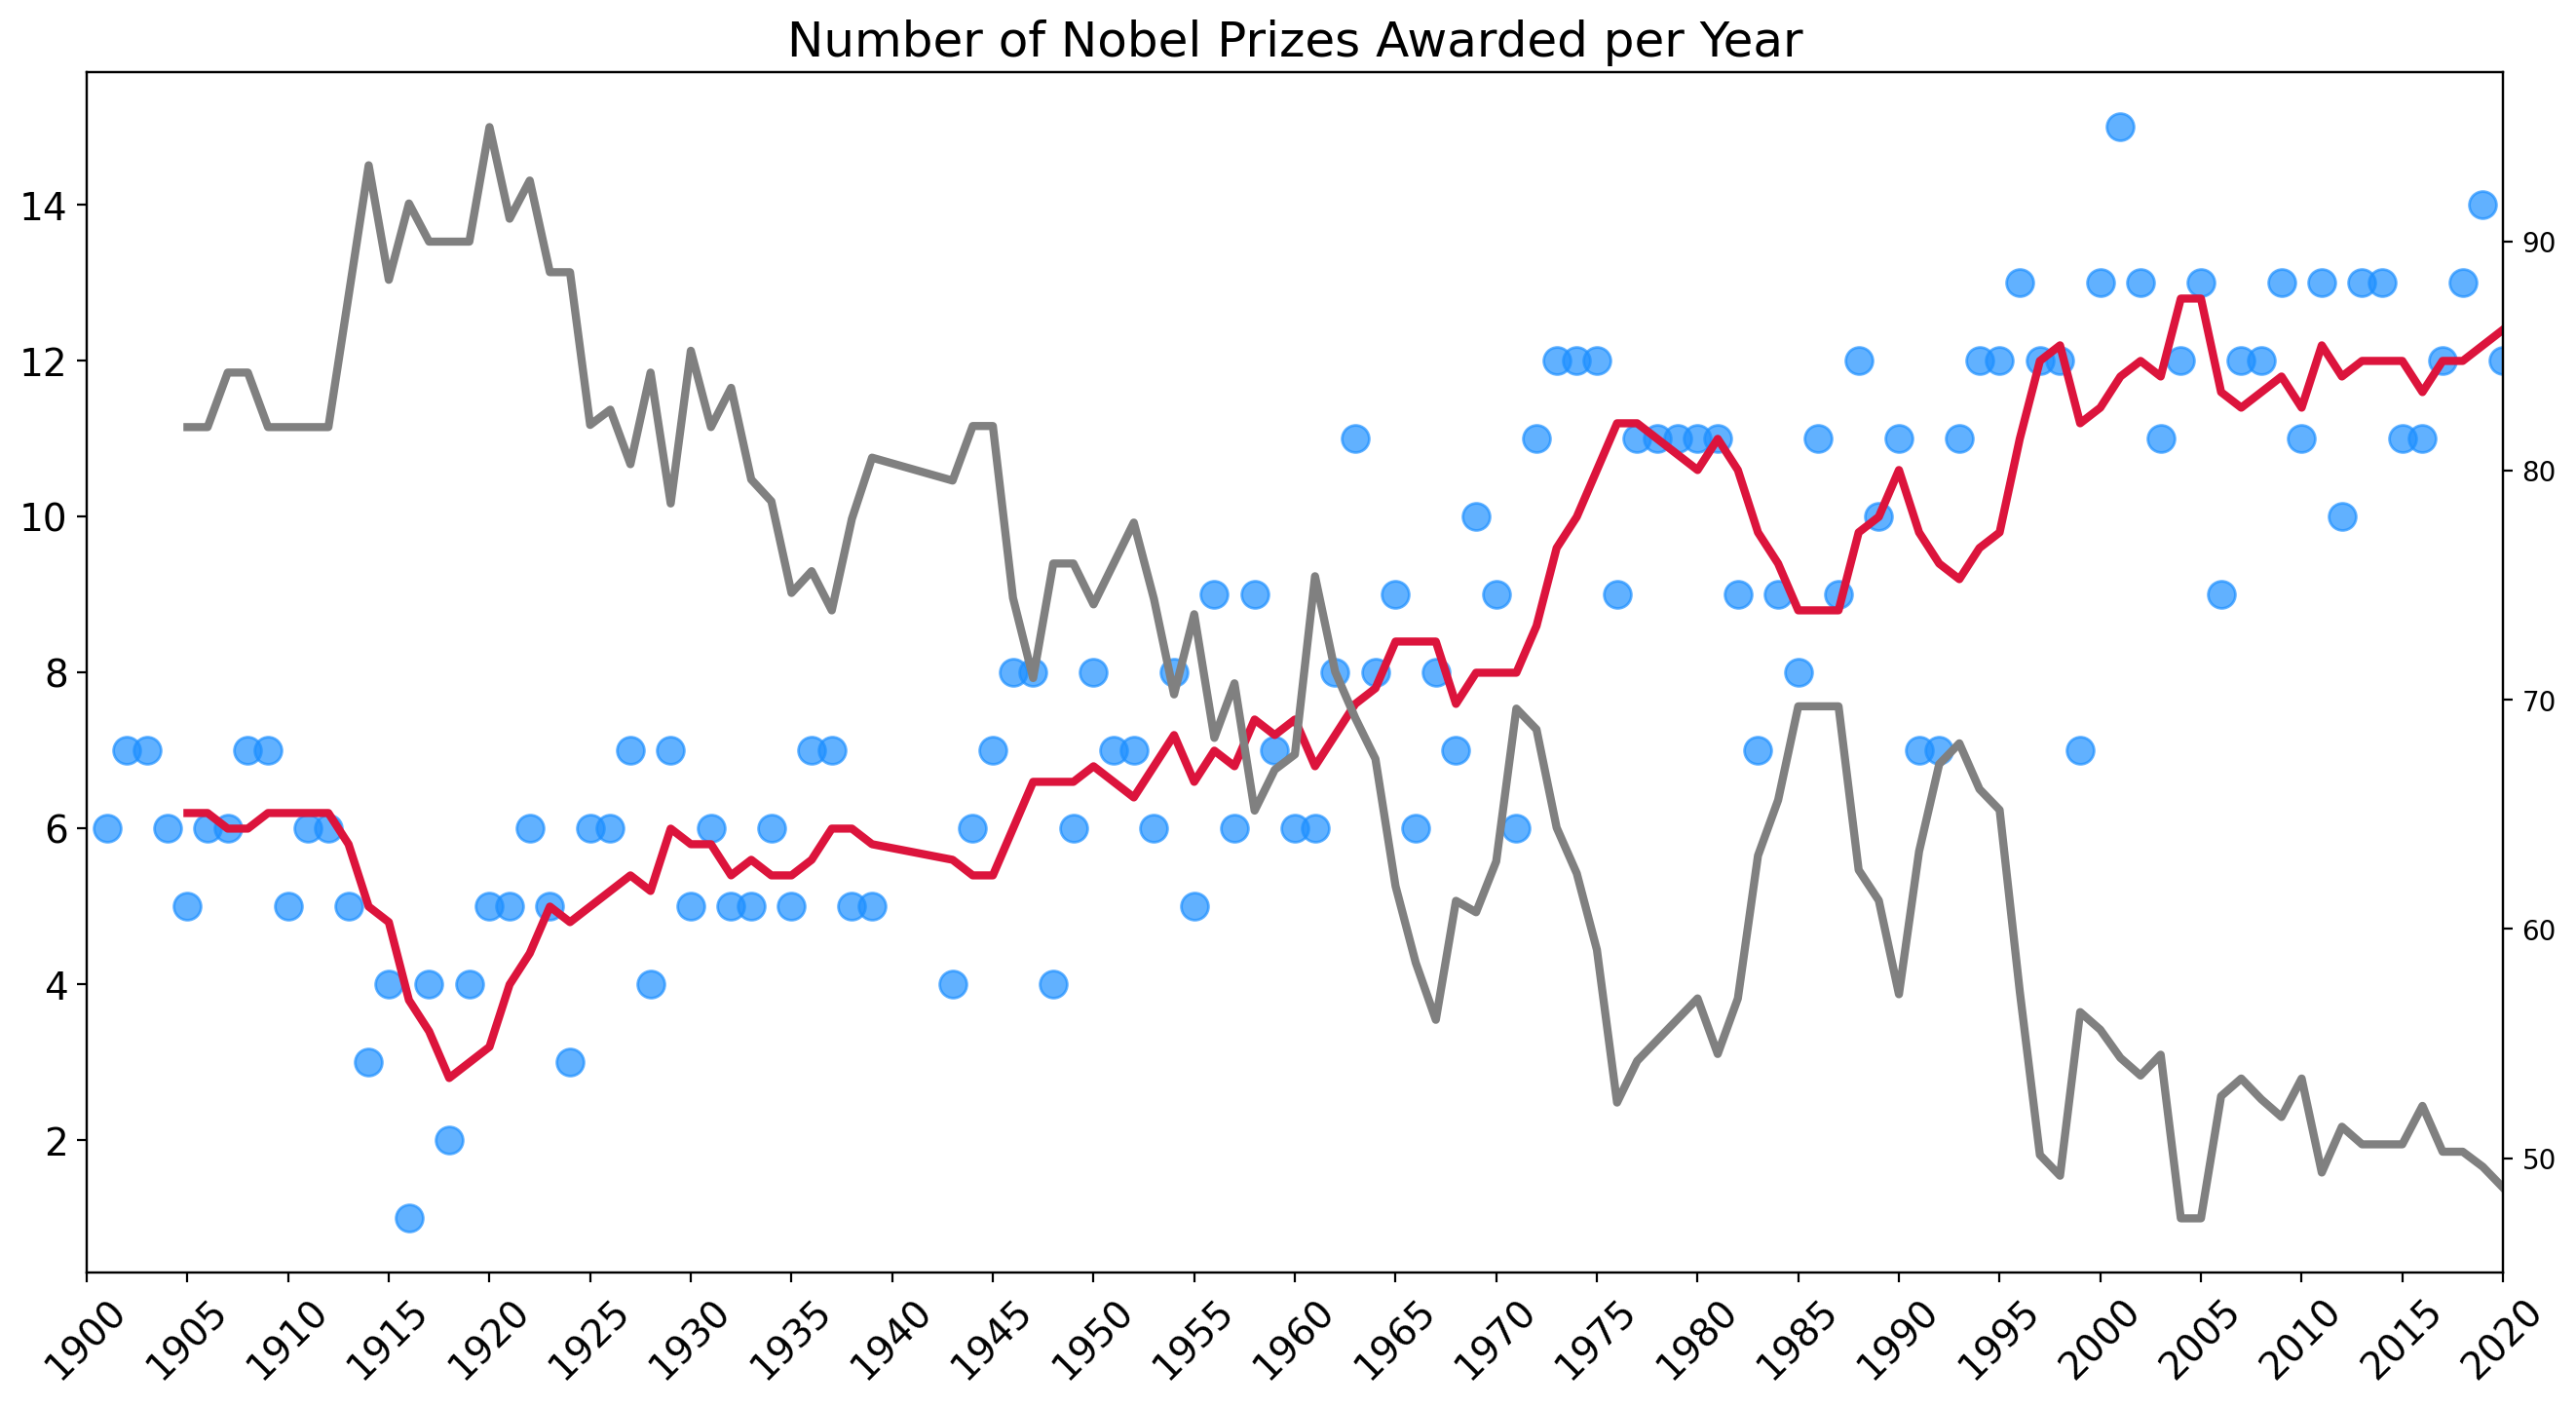

In [84]:
plt.figure(figsize=(16,8), dpi=200)
plt.title('Number of Nobel Prizes Awarded per Year', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(1900, 2021, step=5),
            fontsize=14,
            rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx() # create second y-axis
ax1.set_xlim(1900, 2020)

ax1.scatter(x=prizes_per_year.index,
            y=prizes_per_year.values,
            c='dodgerblue',
            alpha=0.7,
            s=100,)

ax1.plot(prizes_per_year.index,
        moving_average.values,
        c='crimson',
        linewidth=3,)

# Adding prize share plot on second axis
ax2.plot(prizes_per_year.index,
        share_moving_average.values,
        c='grey',
        linewidth=3,)

plt.show()

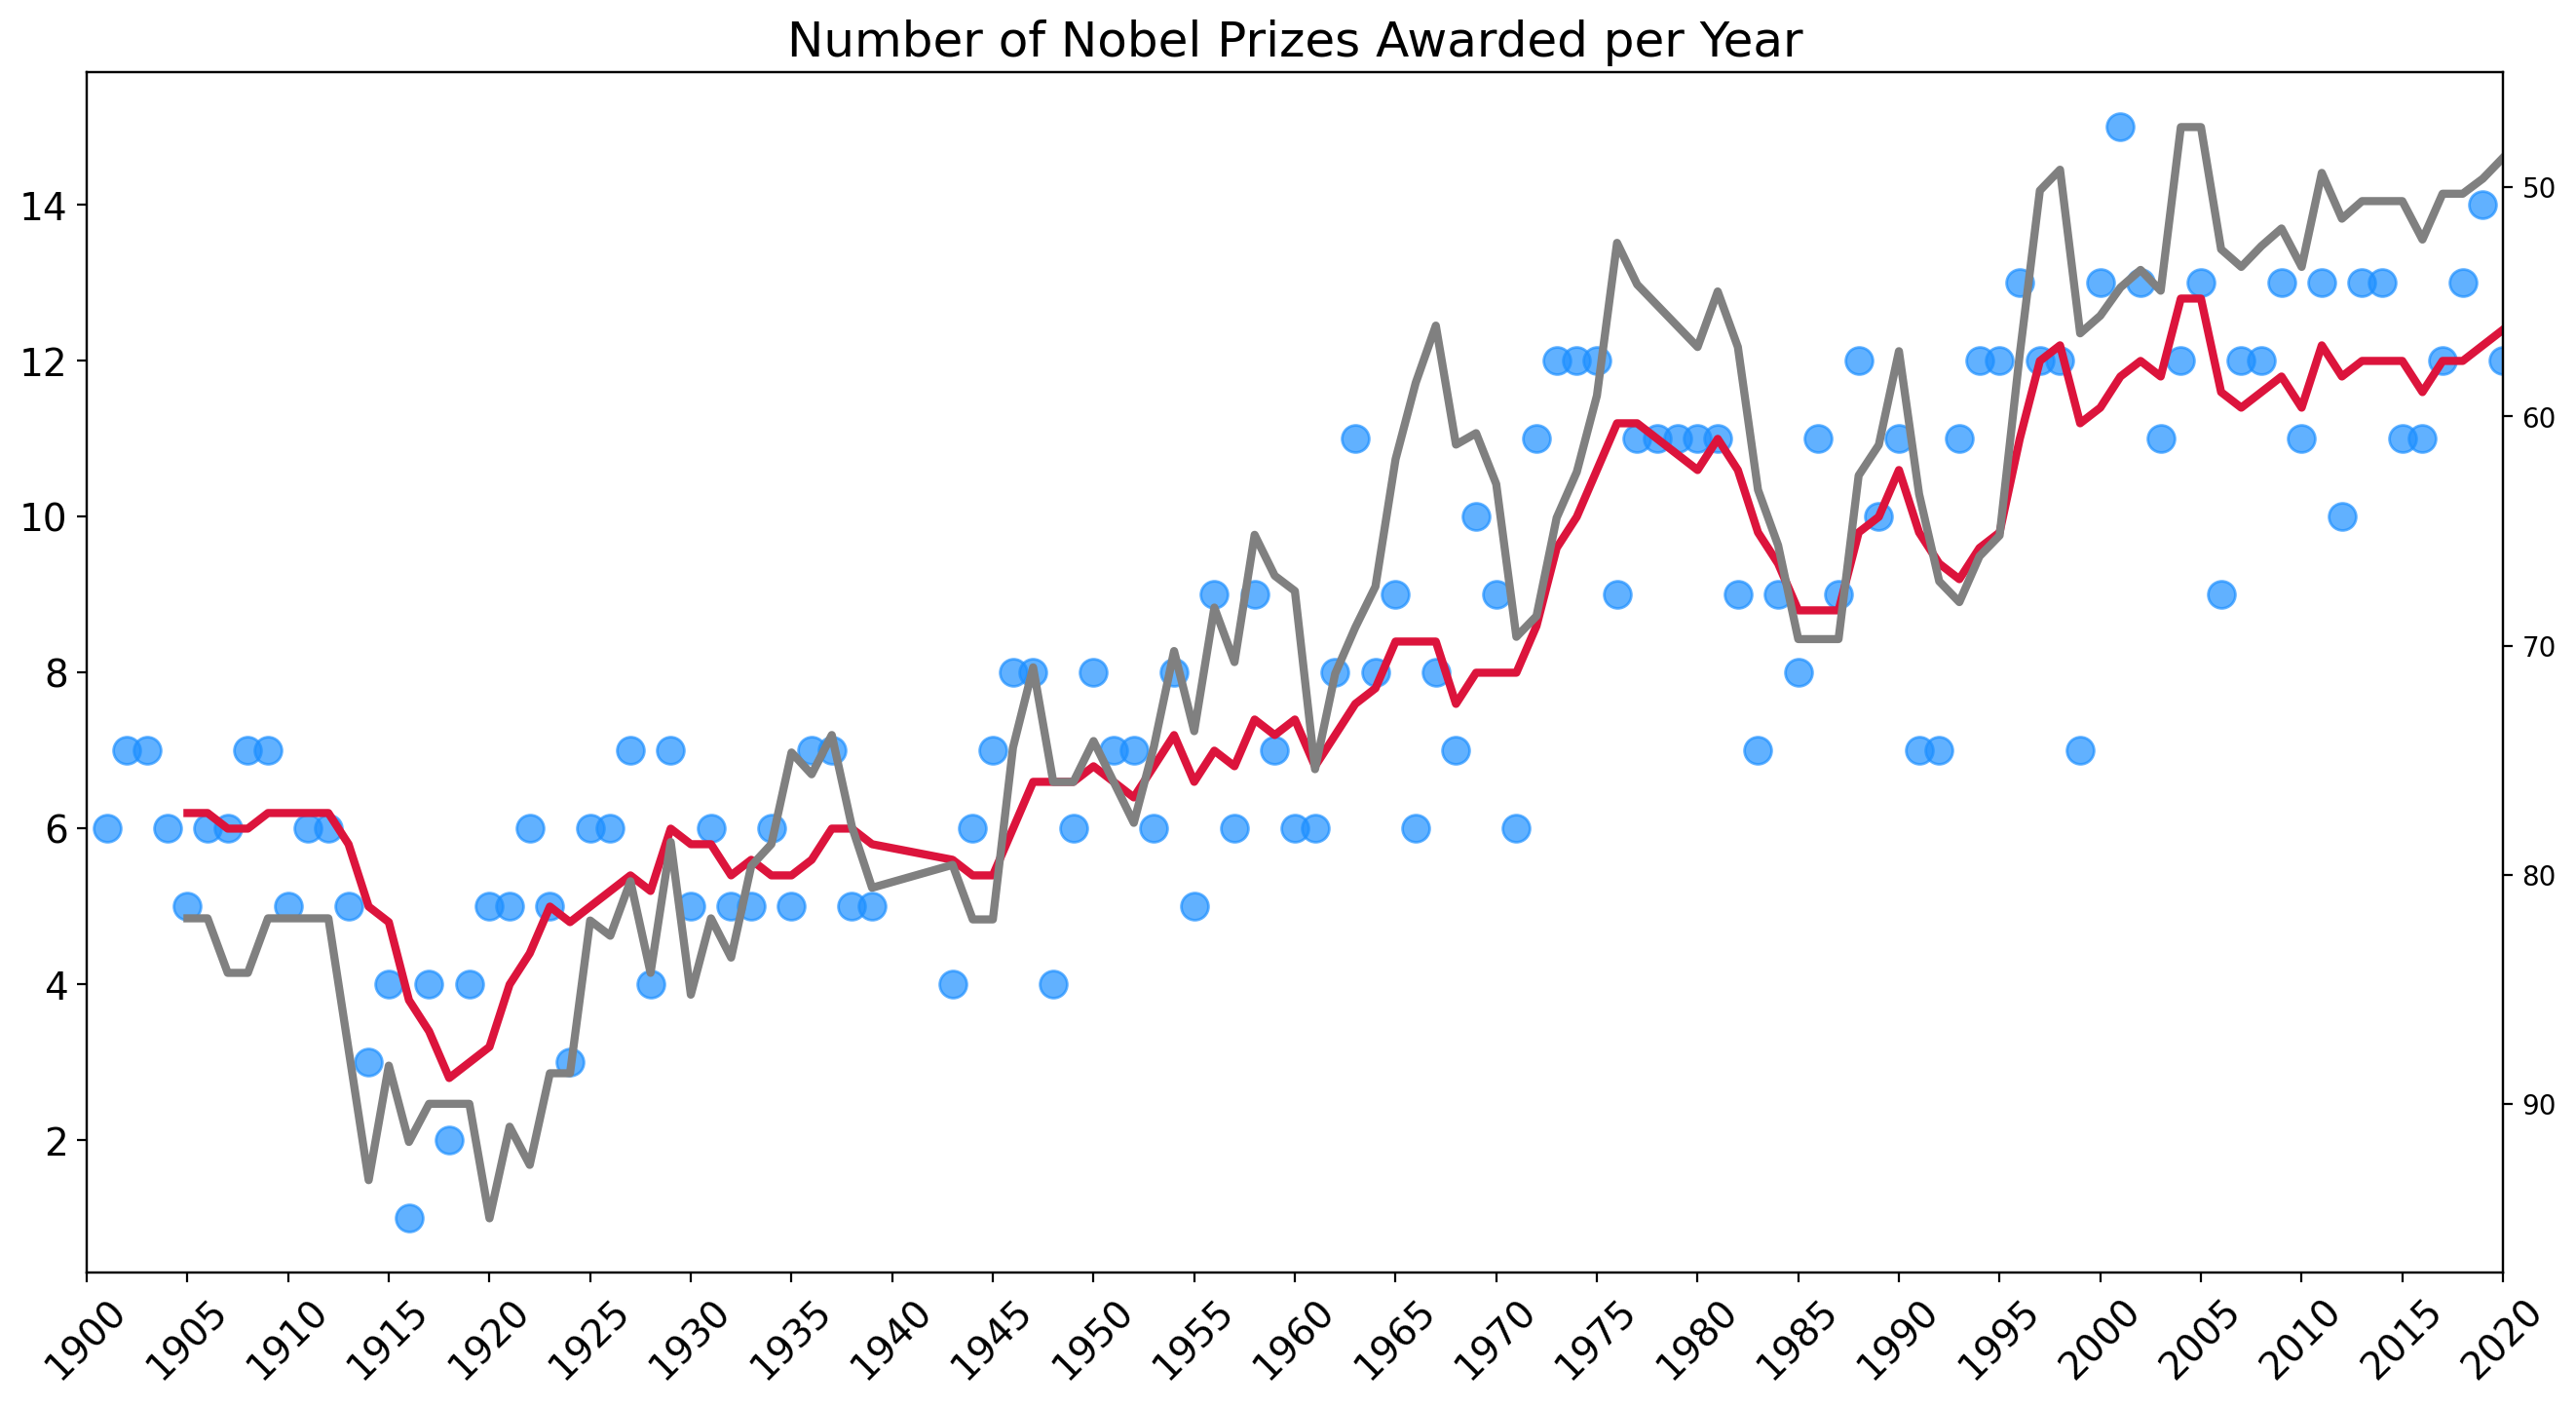

In [89]:
    plt.figure(figsize=(16,8), dpi=200)
    plt.title('Number of Nobel Prizes Awarded per Year', fontsize=18)
    plt.yticks(fontsize=14)
    plt.xticks(ticks=np.arange(1900, 2021, step=5),
               fontsize=14,
               rotation=45)

    ax1 = plt.gca()
    ax2 = ax1.twinx()
    ax1.set_xlim(1900, 2020)

    # Can invert axis
    ax2.invert_yaxis()

    ax1.scatter(x=prizes_per_year.index,
               y=prizes_per_year.values,
               c='dodgerblue',
               alpha=0.7,
               s=100,)

    ax1.plot(prizes_per_year.index,
            moving_average.values,
            c='crimson',
            linewidth=3,)

    ax2.plot(prizes_per_year.index,
            share_moving_average.values,
            c='grey',
            linewidth=3,)

    plt.show()

# The Countries with the Most Nobel Prizes

**Challenge**:
* Create a Pandas DataFrame called `top20_countries` that has the two columns. The `prize` column should contain the total number of prizes won.

<img src=https://i.imgur.com/6HM8rfB.png width=350>

* Is it best to use `birth_country`, `birth_country_current` or `organization_country`?
* What are some potential problems when using `birth_country` or any of the others? Which column is the least problematic?
* Then use plotly to create a horizontal bar chart showing the number of prizes won by each country. Here's what you're after:

<img src=https://i.imgur.com/agcJdRS.png width=750>

* What is the ranking for the top 20 countries in terms of the number of prizes?

In [107]:
top20_countries = df_data.groupby('birth_country_current', as_index=False).agg({'prize': pd.Series.count})
top20_countries.sort_values('prize', ascending=False, inplace=True)
top20_countries = top20_countries.head(20)
top20_countries

,birth_country_current,prize
74,United States of America,281
73,United Kingdom,105
26,Germany,84
25,France,57
67,Sweden,29
57,Poland,27
40,Japan,27
61,Russia,26
11,Canada,20
39,Italy,19


In [108]:
h_bar = px.bar(x=top20_countries.prize,
                y=top20_countries.birth_country_current,
                orientation='h',
                color=top20_countries.prize,
                color_continuous_scale='Viridis',
                title='Top 20 Countries by Number of Prizes')

h_bar.update_layout(xaxis_title='Number of Prizes',
                    yaxis_title='Country',
                    coloraxis_showscale=False)
h_bar.show()

# Use a Choropleth Map to Show the Number of Prizes Won by Country

* Create this choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/):

<img src=https://i.imgur.com/s4lqYZH.png>

* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map.

Hint: You'll need to use a 3 letter country code for each country.


In [109]:
df_countries = df_data.groupby(['birth_country_current', 'ISO'],
                                as_index=False).agg({'prize': pd.Series.count})
df_countries.sort_values('prize', ascending=False)
df_countries

,birth_country_current,ISO,prize
0,Algeria,DZA,2
1,Argentina,ARG,4
2,Australia,AUS,10
3,Austria,AUT,18
4,Azerbaijan,AZE,1
...,...,...,...
74,United States of America,USA,281
75,Venezuela,VEN,1
76,Vietnam,VNM,1
77,Yemen,YEM,1


In [110]:
world_map = px.choropleth(df_countries,
                          locations='ISO',
                          color='prize',
                          hover_name='birth_country_current',
                          color_continuous_scale=px.colors.sequential.matter)

world_map.update_layout(coloraxis_showscale=True,)

world_map.show()

# In Which Categories are the Different Countries Winning Prizes?

**Challenge**: See if you can divide up the plotly bar chart you created above to show the which categories made up the total number of prizes. Here's what you're aiming for:

<img src=https://i.imgur.com/iGaIKCL.png>

* In which category are Germany and Japan the weakest compared to the United States?
* In which category does Germany have more prizes than the UK?
* In which categories does France have more prizes than Germany?
* Which category makes up most of Australia's nobel prizes?
* Which category makes up half of the prizes in the Netherlands?
* Does the United States have more prizes in Economics than all of France? What about in Physics or Medicine?


The hard part is preparing the data for this chart!


*Hint*: Take a two-step approach. The first step is grouping the data by country and category. Then you can create a DataFrame that looks something like this:

<img src=https://i.imgur.com/VKjzKa1.png width=450>


In [114]:
df_countries_categories = df_data.groupby(['birth_country_current', 'category'],
                                as_index=False).agg({'prize': pd.Series.count})
df_countries_categories.sort_values('prize', ascending=False, inplace=True)
df_countries_categories

,birth_country_current,category,prize
204,United States of America,Medicine,78
206,United States of America,Physics,70
201,United States of America,Chemistry,55
202,United States of America,Economics,49
198,United Kingdom,Medicine,28
...,...,...,...
190,Turkey,Chemistry,1
207,Venezuela,Medicine,1
208,Vietnam,Peace,1
209,Yemen,Peace,1


In [117]:
merged_df = pd.merge(df_countries_categories, top20_countries, on='birth_country_current')
merged_df.columns = ['birth_country_current', 'category', 'cat_prize', 'total_prize']
merged_df.sort_values(by='total_prize', ascending=False, inplace=True)
merged_df

,birth_country_current,category,cat_prize,total_prize
0,United States of America,Medicine,78,281
1,United States of America,Physics,70,281
2,United States of America,Chemistry,55,281
3,United States of America,Economics,49,281
9,United States of America,Peace,19,281
...,...,...,...,...
94,Belgium,Literature,1,9
95,Belgium,Physics,1,9
100,India,Physics,1,9
107,Hungary,Economics,1,9


In [118]:
cat_cntry_bar = px.bar(x=merged_df.cat_prize,
                        y=merged_df.birth_country_current,
                        color=merged_df.category,
                        orientation='h',
                        title='Top 20 Countries by Number of Prizes and Category')

cat_cntry_bar.update_layout(xaxis_title='Number of Prizes',
                            yaxis_title='Country')
cat_cntry_bar.show()

### Number of Prizes Won by Each Country Over Time

* When did the United States eclipse every other country in terms of the number of prizes won?
* Which country or countries were leading previously?
* Calculate the cumulative number of prizes won by each country in every year. Again, use the `birth_country_current` of the winner to calculate this.
* Create a [plotly line chart](https://plotly.com/python/line-charts/) where each country is a coloured line.

In [119]:
prize_by_year = df_data.groupby(by=['birth_country_current', 'year'], as_index=False).count()
prize_by_year = prize_by_year.sort_values('year')[['year', 'birth_country_current', 'prize']]
prize_by_year

,year,birth_country_current,prize
312,1901,Netherlands,1
346,1901,Poland,1
118,1901,France,2
159,1901,Germany,1
440,1901,Switzerland,1
...,...,...,...
244,2019,India,1
221,2020,Germany,1
158,2020,France,1
533,2020,United Kingdom,2


In [121]:
cumulative_prizes = prize_by_year.groupby(by=['birth_country_current',
                                              'year']).sum().groupby(level=[0]).cumsum()
cumulative_prizes.reset_index(inplace=True)

In [122]:
l_chart = px.line(cumulative_prizes,
                  x='year',
                  y='prize',
                  color='birth_country_current',
                  hover_name='birth_country_current')

l_chart.update_layout(xaxis_title='Year',
                      yaxis_title='Number of Prizes')

l_chart.show()

# What are the Top Research Organisations?

**Challenge**: Create a bar chart showing the organisations affiliated with the Nobel laureates. It should looks something like this:

<img src=https://i.imgur.com/zZihj2p.png width=600>

* Which organisations make up the top 20?
* How many Nobel prize winners are affiliated with the University of Chicago and Harvard University?

In [124]:
top20_orgs = df_data.organization_name.value_counts()[:20]
top20_orgs.sort_values(ascending=False, inplace=True)
top20_orgs

,count
organization_name,
University of California,40
Harvard University,29
Stanford University,23
Massachusetts Institute of Technology (MIT),21
University of Chicago,20
University of Cambridge,18
California Institute of Technology (Caltech),17
Columbia University,17
Princeton University,15


In [125]:
org_bar = px.bar(x = top20_orgs.values,
                  y = top20_orgs.index,
                  orientation='h',
                  color=top20_orgs.values,
                  color_continuous_scale=px.colors.sequential.haline,
                  title='Top 20 Research Institutions by Number of Prizes')

org_bar.update_layout(xaxis_title='Number of Prizes',
                      yaxis_title='Institution',
                      coloraxis_showscale=False)
org_bar.show()

# Which Cities Make the Most Discoveries?

Where do major discoveries take place?  

**Challenge**:
* Create another plotly bar chart graphing the top 20 organisation cities of the research institutions associated with a Nobel laureate.
* Where is the number one hotspot for discoveries in the world?
* Which city in Europe has had the most discoveries?

In [126]:
top20_org_cities = df_data.organization_city.value_counts()[:20]
top20_org_cities.sort_values(ascending=False, inplace=True)
top20_org_cities

,count
organization_city,
"Cambridge, MA",50
"New York, NY",45
Cambridge,31
London,27
Paris,25
"Stanford, CA",24
"Berkeley, CA",21
"Chicago, IL",20
"Princeton, NJ",19


In [127]:
city_bar2 = px.bar(x = top20_org_cities.values,
                  y = top20_org_cities.index,
                  orientation='h',
                  color=top20_org_cities.values,
                  color_continuous_scale=px.colors.sequential.Plasma,
                  title='Which Cities Do the Most Research?')

city_bar2.update_layout(xaxis_title='Number of Prizes',
                        yaxis_title='City',
                        coloraxis_showscale=False)
city_bar2.show()

# Where are Nobel Laureates Born? Chart the Laureate Birth Cities

**Challenge**:
* Create a plotly bar chart graphing the top 20 birth cities of Nobel laureates.
* Use a named colour scale called `Plasma` for the chart.
* What percentage of the United States prizes came from Nobel laureates born in New York?
* How many Nobel laureates were born in London, Paris and Vienna?
* Out of the top 5 cities, how many are in the United States?


In [130]:
top20_cities = df_data.birth_city.value_counts()[:20]
top20_cities.sort_values(ascending=False, inplace=True)
top20_cities

,count
birth_city,
"New York, NY",53
Paris,26
London,19
Vienna,14
"Chicago, IL",12
Berlin,11
Budapest,8
"Brooklyn, NY",8
"Boston, MA",8


In [131]:
city_bar = px.bar(x=top20_cities.values,
                  y=top20_cities.index,
                  orientation='h',
                  color=top20_cities.values,
                  color_continuous_scale=px.colors.sequential.Plasma,
                  title='Where were the Nobel Laureates Born?')

city_bar.update_layout(xaxis_title='Number of Prizes',
                        yaxis_title='City of Birth',
                        coloraxis_showscale=False)
city_bar.show()

# Plotly Sunburst Chart: Combine Country, City, and Organisation

**Challenge**:

* Create a DataFrame that groups the number of prizes by organisation.
* Then use the [plotly documentation to create a sunburst chart](https://plotly.com/python/sunburst-charts/)
* Click around in your chart, what do you notice about Germany and France?


Here's what you're aiming for:

<img src=https://i.imgur.com/cemX4m5.png width=300>



In [132]:
country_city_org = df_data.groupby(by=['organization_country',
                                        'organization_city',
                                        'organization_name'], as_index=False).agg({'prize': pd.Series.count})

country_city_org = country_city_org.sort_values('prize', ascending=False)
country_city_org

,organization_country,organization_city,organization_name,prize
205,United States of America,"Cambridge, MA",Harvard University,29
280,United States of America,"Stanford, CA",Stanford University,23
206,United States of America,"Cambridge, MA",Massachusetts Institute of Technology (MIT),21
209,United States of America,"Chicago, IL",University of Chicago,20
195,United States of America,"Berkeley, CA",University of California,19
...,...,...,...,...
8,Austria,Innsbruck,Innsbruck University,1
6,Austria,Altenberg; Grünau im Almtal,Konrad-Lorenz-Institut der Österreichischen Ak...,1
5,Australia,Weston Creek,Australian National University,1
4,Australia,Nedlands,"NHMRC Helicobacter pylori Research Laboratory,...",1


In [133]:
burst = px.sunburst(country_city_org,
                    path=['organization_country', 'organization_city', 'organization_name'],
                    values='prize',
                    title='Where do Discoveries Take Place?',
                    )

burst.update_layout(xaxis_title='Number of Prizes',
                    yaxis_title='City',
                    coloraxis_showscale=False)

burst.show()

# Patterns in the Laureate Age at the Time of the Award

How Old Are the Laureates When the Win the Prize?

**Challenge**: Calculate the age of the laureate in the year of the ceremony and add this as a column called `winning_age` to the `df_data` DataFrame. Hint: you can use [this](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.html) to help you.



In [145]:
df_data['winning_age'] = df_data.year.dt.year - df_data.birth_date.dt.year
df_data.head()

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct,winning_age
0,1901-01-01,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD,100.00,49.00
1,1901-01-01,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA,100.00,62.00
2,1901-01-01,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL,100.00,47.00
3,1901-01-01,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA,50.00,79.00
4,1901-01-01,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE,50.00,73.00


### Who were the oldest and youngest winners?

**Challenge**:
* What are the names of the youngest and oldest Nobel laureate?
* What did they win the prize for?
* What is the average age of a winner?
* 75% of laureates are younger than what age when they receive the prize?
* Use Seaborn to [create histogram](https://seaborn.pydata.org/generated/seaborn.histplot.html) to visualise the distribution of laureate age at the time of winning. Experiment with the number of `bins` to see how the visualisation changes.

In [146]:
display(df_data.nlargest(n=1, columns='winning_age'))
display(df_data.nsmallest(n=1, columns='winning_age'))

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct,winning_age
937,2019-01-01,Chemistry,The Nobel Prize in Chemistry 2019,“for the development of lithium-ion batteries”,1/3,Individual,John Goodenough,1922-07-25,Jena,Germany,Germany,Male,University of Texas,Austin TX,United States of America,DEU,33.33,97.00


,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct,winning_age
885,2014-01-01,Peace,The Nobel Peace Prize 2014,"""for their struggle against the suppression of...",1/2,Individual,Malala Yousafzai,1997-07-12,Mingora,Pakistan,Pakistan,Female,NaN,NaN,NaN,PAK,50.00,17.00


### Descriptive Statistics for the Laureate Age at Time of Award

* Calculate the descriptive statistics for the age at the time of the award.
* Then visualise the distribution in the form of a histogram using [Seaborn's .histplot() function](https://seaborn.pydata.org/generated/seaborn.histplot.html).
* Experiment with the `bin` size. Try 10, 20, 30, and 50.  

In [147]:
df_data.winning_age.describe()

,winning_age
count,934.00
mean,59.95
std,12.62
min,17.00
25%,51.00
50%,60.00
75%,69.00
max,97.00


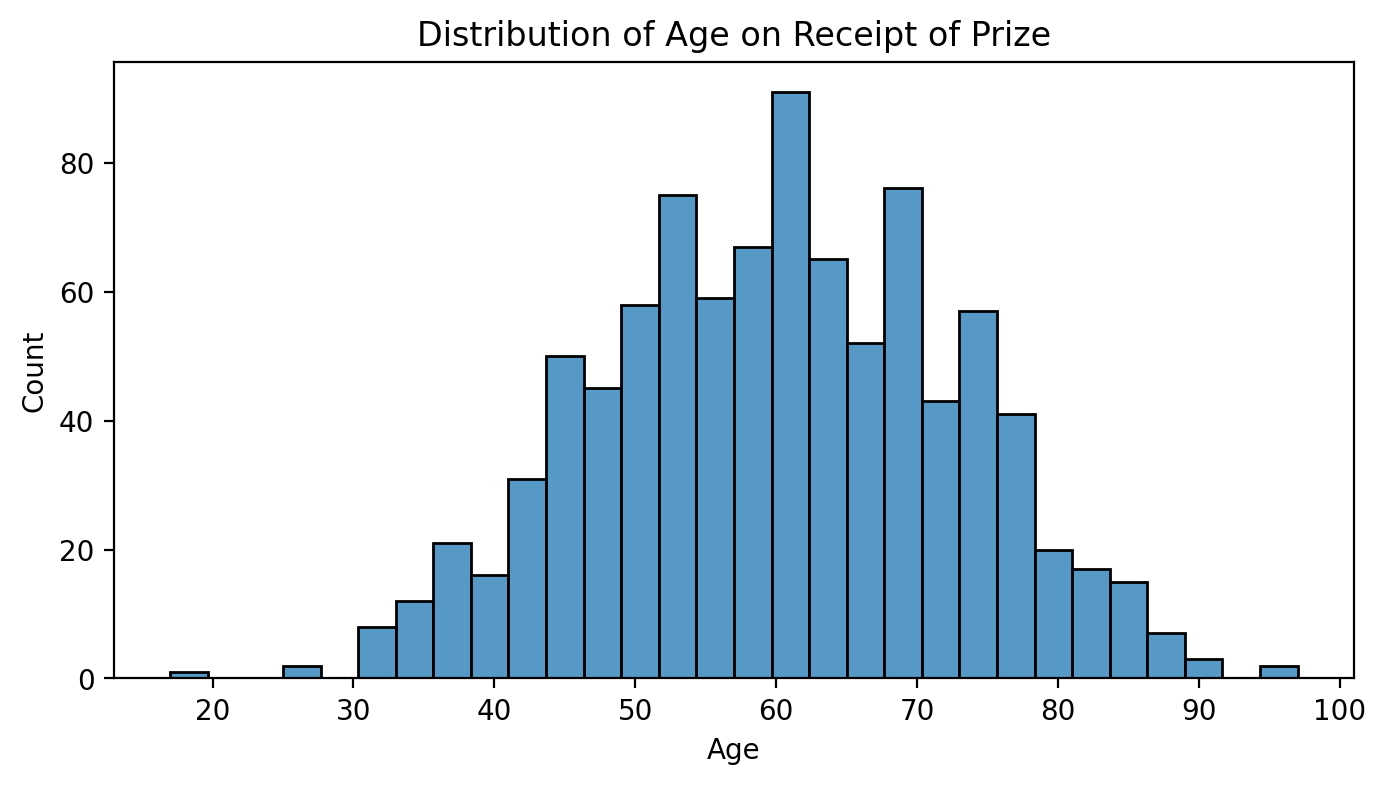

In [148]:
plt.figure(figsize=(8, 4), dpi=200)
sns.histplot(data=df_data,
              x=df_data.winning_age,
              bins=30)
plt.xlabel('Age')
plt.title('Distribution of Age on Receipt of Prize')
plt.show()

### Age at Time of Award throughout History

Are Nobel laureates being nominated later in life than before? Have the ages of laureates at the time of the award increased or decreased over time?

**Challenge**

* Use Seaborn to [create a .regplot](https://seaborn.pydata.org/generated/seaborn.regplot.html?highlight=regplot#seaborn.regplot) with a trendline.
* Set the `lowess` parameter to `True` to show a moving average of the linear fit.
* According to the best fit line, how old were Nobel laureates in the years 1900-1940 when they were awarded the prize?
* According to the best fit line, what age would it predict for a Nobel laureate in 2020?


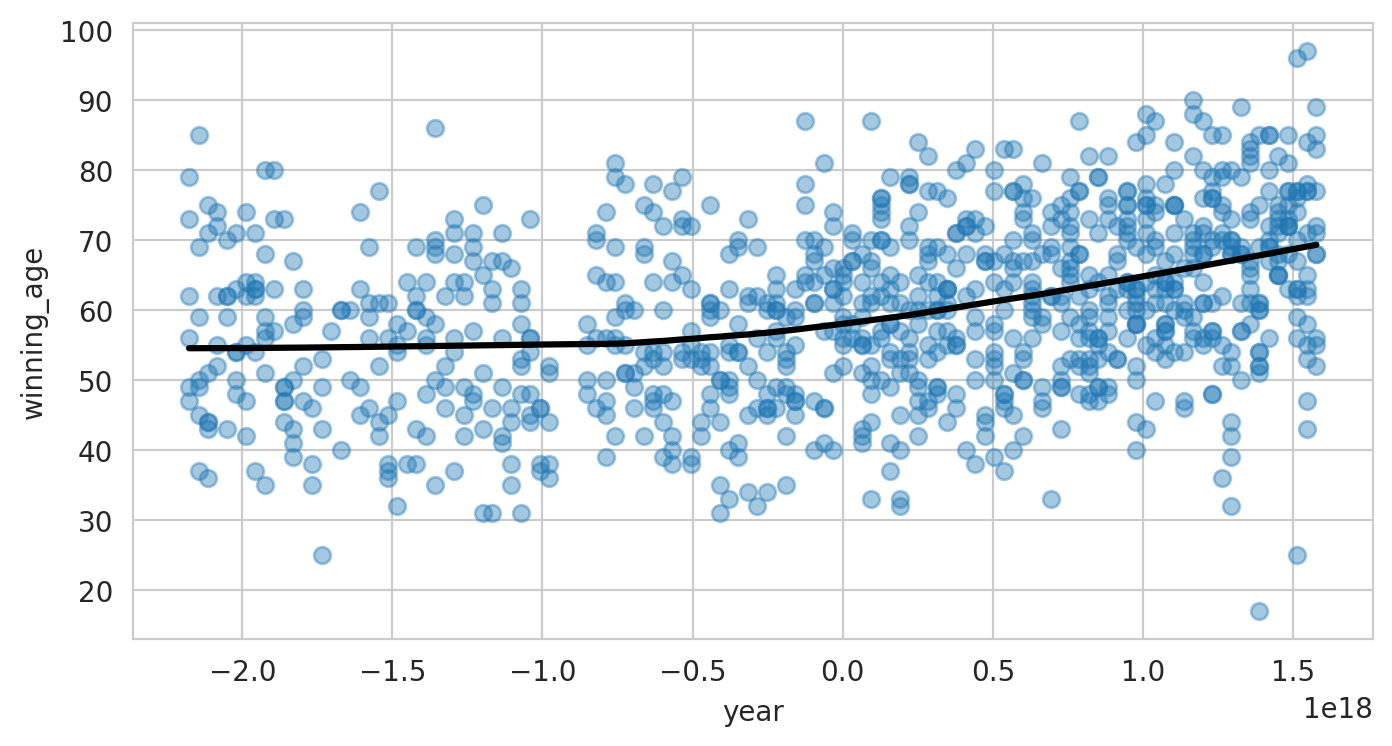

In [155]:
df_data.year = pd.to_numeric(df_data.year)
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
    sns.regplot(data=df_data,
                x='year',
                y='winning_age',
                lowess=True,
                scatter_kws = {'alpha': 0.4},
                line_kws={'color': 'black'})

plt.show()

### Winning Age Across the Nobel Prize Categories

How does the age of laureates vary by category?

* Use Seaborn's [`.boxplot()`](https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot) to show how the mean, quartiles, max, and minimum values vary across categories. Which category has the longest "whiskers"?
* In which prize category are the average winners the oldest?
* In which prize category are the average winners the youngest?

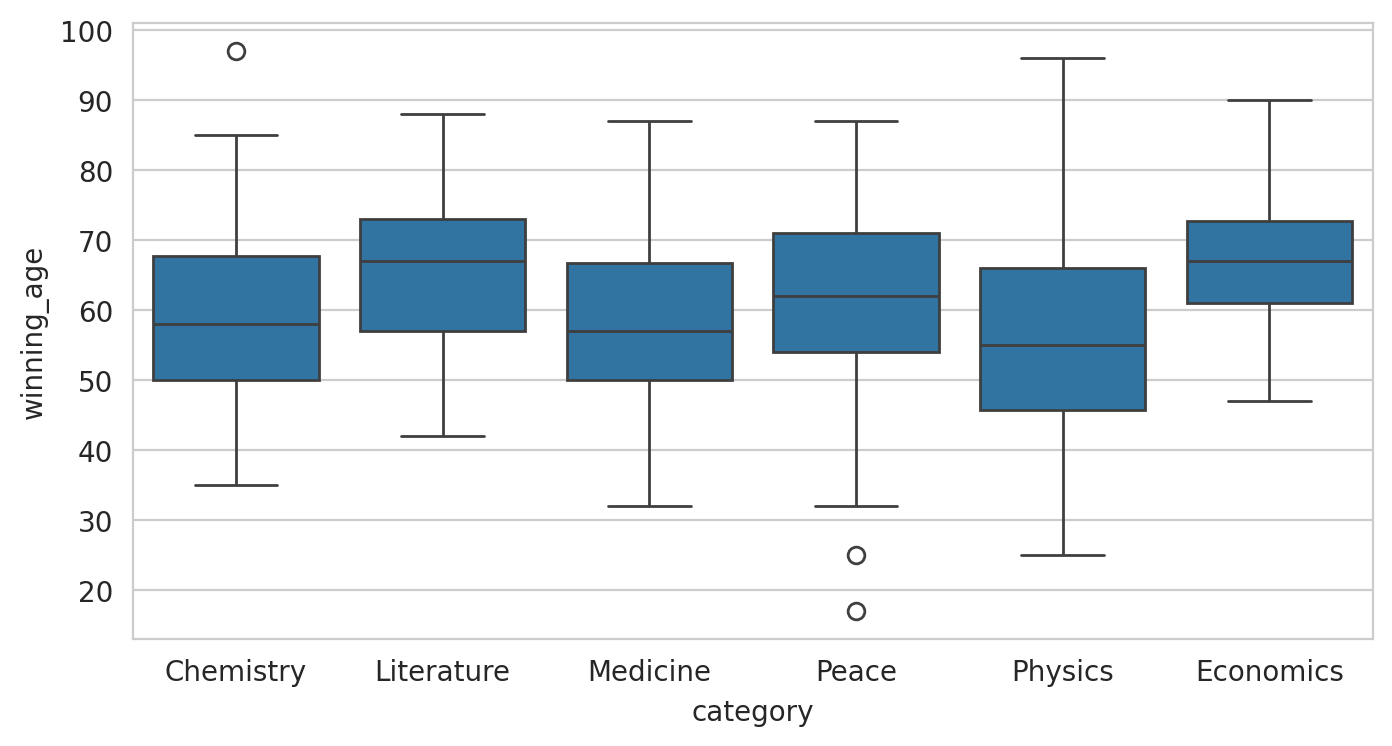

In [151]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
    sns.boxplot(data=df_data,
                x='category',
                y='winning_age')

plt.show()

**Challenge**
* Now use Seaborn's [`.lmplot()`](https://seaborn.pydata.org/generated/seaborn.lmplot.html?highlight=lmplot#seaborn.lmplot) and the `row` parameter to create 6 separate charts for each prize category. Again set `lowess` to `True`.
* What are the winning age trends in each category?
* Which category has the age trending up and which category has the age trending down?
* Is this `.lmplot()` telling a different story from the `.boxplot()`?
* Create another chart with Seaborn. This time use `.lmplot()` to put all 6 categories on the same chart using the `hue` parameter.


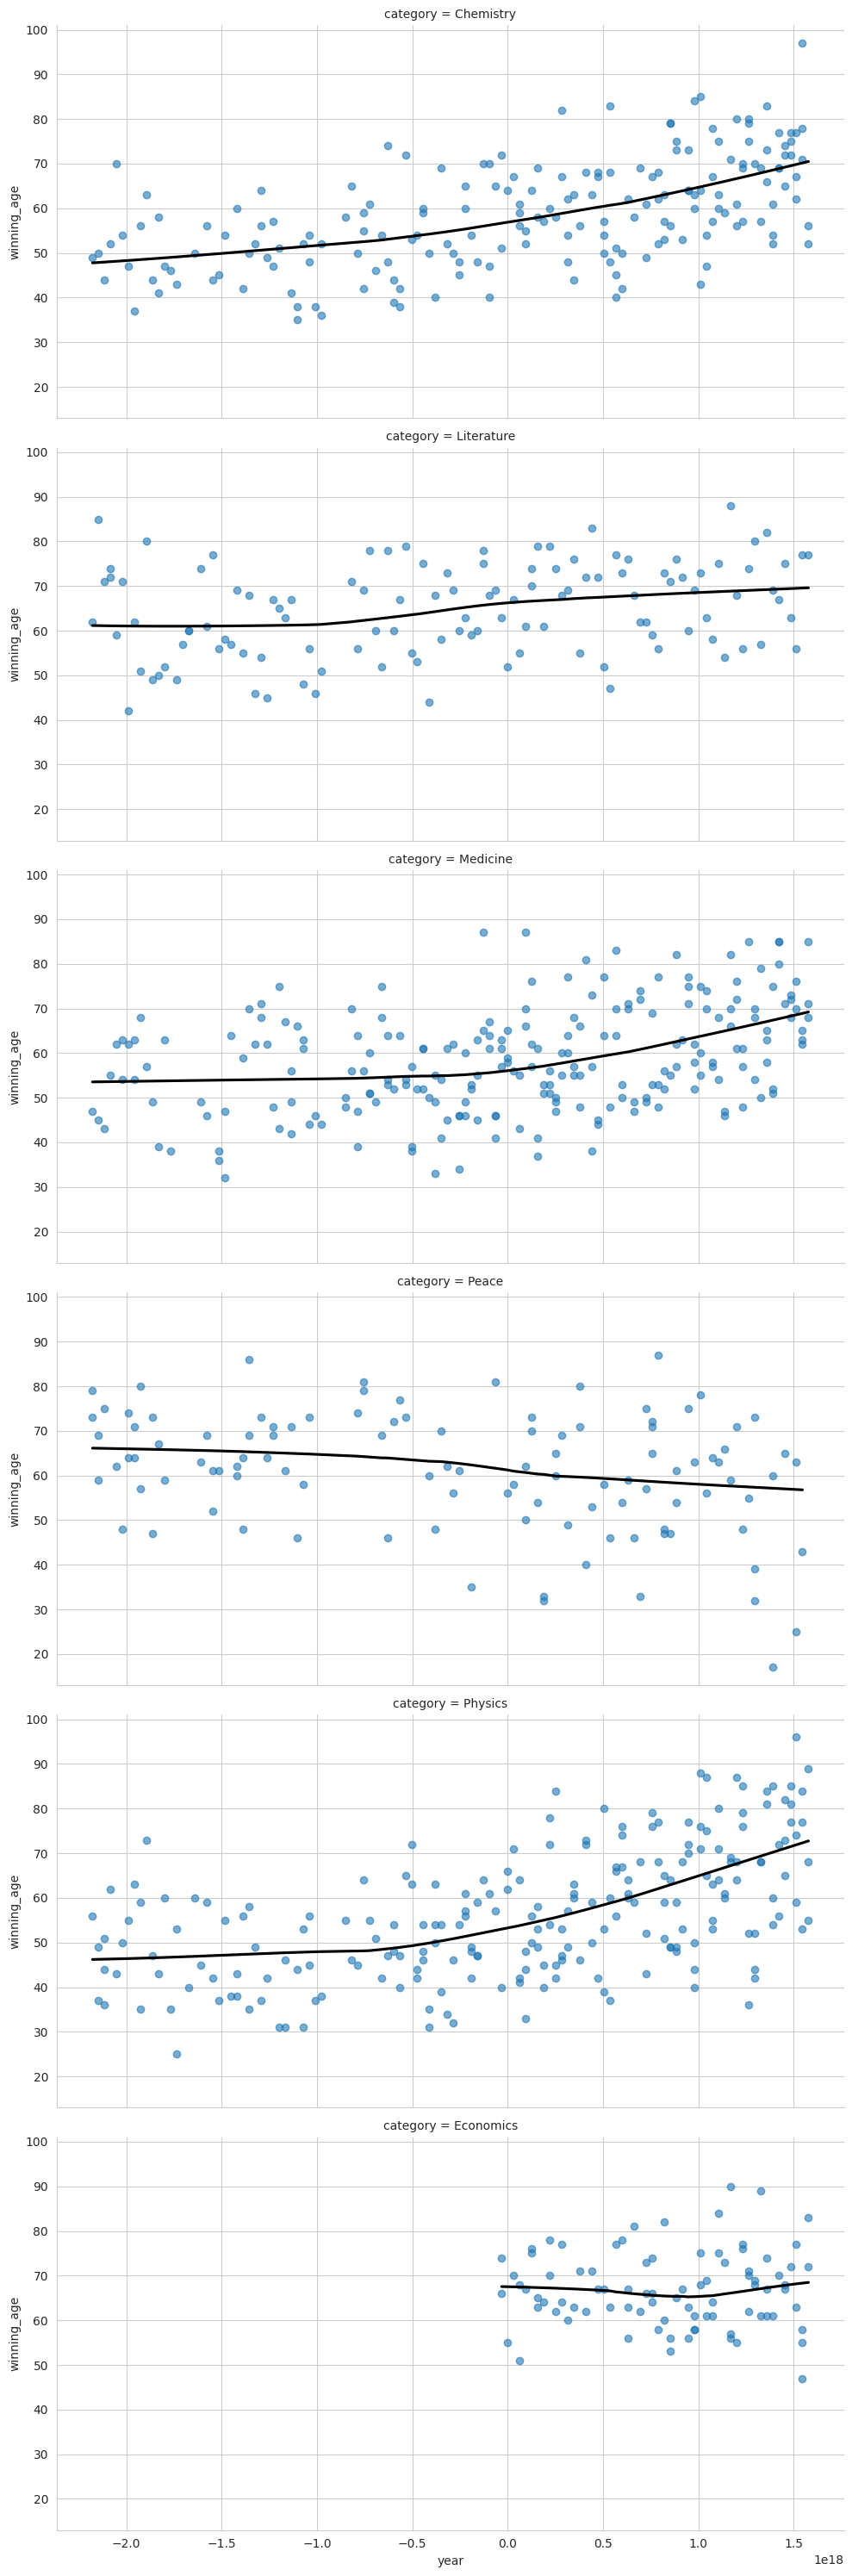

In [154]:
df_data.year = pd.to_numeric(df_data.year)
with sns.axes_style('whitegrid'):
    sns.lmplot(data=df_data,
                x='year',
                y='winning_age',
                row = 'category',
                lowess=True,
                aspect=2,
                scatter_kws = {'alpha': 0.6},
                line_kws = {'color': 'black'},)

plt.show()